In [1]:
from PIL import Image
import numpy as np
import socket
import struct
import matplotlib.pyplot as plt

/home/daniel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import itertools


def byte_array_to_bool_array(byte_array, original_shape):
    flat_bool_array = []
    
    for byte in byte_array:
        for bit in range(8):
            flat_bool_array.append(bool(byte & (1 << bit)))

    # flat_bool_array = flat_bool_array[:original_shape[0] * original_shape[1]]
    bool_array = np.array(flat_bool_array).reshape(original_shape)

    return bool_array

def plot_bool_array(bool_array):
    """
    Plot a 2D boolean array using matplotlib.
    
    :param bool_array: 2D numpy array of booleans
    """
    plt.imshow(bool_array, cmap='gray', interpolation='nearest')
    plt.title('2D Boolean Array')
    plt.show()

def receive(ip_address, port, buffer_size=1024):
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    sock.bind((ip_address, port))
    print(f"Listening on {ip_address}:{port}")

    partial_data = {}
    array_shapes = {}

    while True:
        packet, addr = sock.recvfrom(buffer_size)
        print(len(packet))

        array_id = packet[0]
        seq_num = packet[1]
        num_packets = packet[2]
        width = packet[3]
        height = packet[4]
        data = packet[5:]

        if array_id not in partial_data:
            partial_data[array_id] = [None] * num_packets
            array_shapes[array_id] = (height, width)

        partial_data[array_id][seq_num] = data
        print(f"Received packet {seq_num + 1}/{num_packets} of array {array_id} from {addr}")

        if None not in partial_data[array_id]:
            full_byte_array = bytearray(itertools.chain(*partial_data[array_id]))
            original_shape = array_shapes[array_id]
            bool_array = byte_array_to_bool_array(full_byte_array, original_shape)
            plot_bool_array(bool_array)
            del partial_data[array_id]
            del array_shapes[array_id]


Listening on 0.0.0.0:5005
1024
Received packet 1/2 of array 0 from ('127.0.0.1', 39735)
10
Received packet 2/2 of array 0 from ('127.0.0.1', 39735)


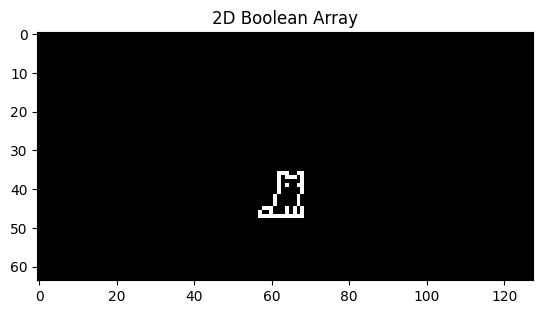

KeyboardInterrupt: 

In [3]:
IP_ADDRESS = "0.0.0.0"  # Listen on all interfaces
PORT = 5005

receive(IP_ADDRESS, PORT)